original images infor: 2 uint16 7931 27253
normalized images infor: 2 float64 0.0 1.0


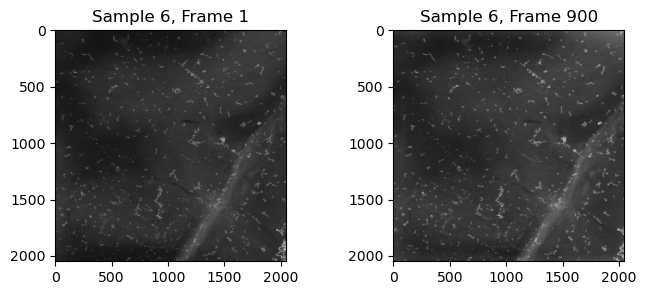

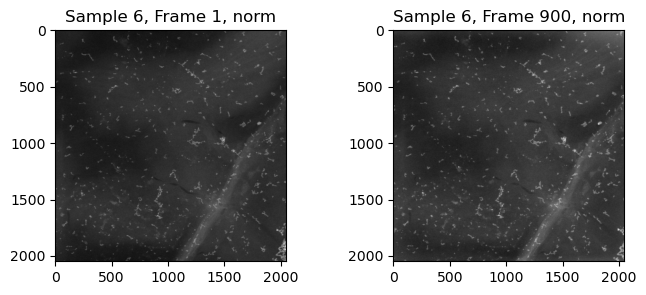

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from image_registration import ImageRegistration as ImgReg

IR = ImgReg()
IR.crop_size = 0

image_path = '/Users/sichen/Box Sync/projects/2024-summer-Sandoval/rad_damage_study'

# file names
# smpl5_f1_name = 'Uncoated_Sample5_Frame1.tif'
# smpl5_f300_name = 'Uncoated_Sample5_Frame300.tif'
smpl6_f1_name = 'Coated_Sample6_Frame1.tif'
smpl6_f900_name = 'Coated_Sample6_Frame900.tif'

# load and crop
IR.load_and_crop_images(image_path+'/'+smpl6_f1_name, image_path+'/'+smpl6_f900_name);

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(8, 3))
ax0.imshow(IR.base_image, cmap='gray')
ax0.set_title("Sample 6, Frame 1")

ax1.imshow(IR.target_image, cmap='gray')
ax1.set_title("Sample 6, Frame 900")

print('original images infor:', len(IR.base_image.shape), IR.base_image.dtype, np.min(IR.base_image), np.max(IR.base_image))

# normlization
IR.normalize_images();

fig1, (ax0, ax1) = plt.subplots(1, 2, figsize=(8, 3))
ax0.imshow(IR.base_image_normalized, cmap='gray')
ax0.set_title("Sample 6, Frame 1, norm")

ax1.imshow(IR.target_image_normalized, cmap='gray')
ax1.set_title("Sample 6, Frame 900, norm")

print('normalized images infor:', len(IR.base_image_normalized.shape), IR.base_image_normalized.dtype, 
      np.min(IR.base_image_normalized), np.max(IR.base_image_normalized))




Shift in x is:  -28.0
Shift in y is:  3.0
Registered image infor: 2 float64 0.0 1.0


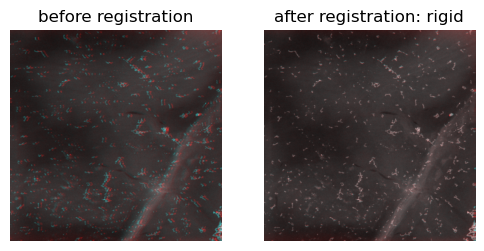

In [2]:
# rigid registration
IR.register_images(method='rigid')
print('Shift in x is: ', IR.shift[1])
print('Shift in y is: ', IR.shift[0])
print('Registered image infor:', len(IR.registered_image.shape), IR.registered_image.dtype, 
      np.min(IR.registered_image), np.max(IR.registered_image))

IR.create_visualization();

fig3, (ax0, ax1) = plt.subplots(1, 2, figsize=(6, 4))

ax0.imshow(IR.rgb_before)
ax0.set_title("before registration")
ax0.set_axis_off()

ax1.imshow(IR.rgb_after)
ax1.set_title("after registration: rigid")
ax1.set_axis_off()

fig.tight_layout()

Text(0.5, 1.0, 'Frame 900, after shift')

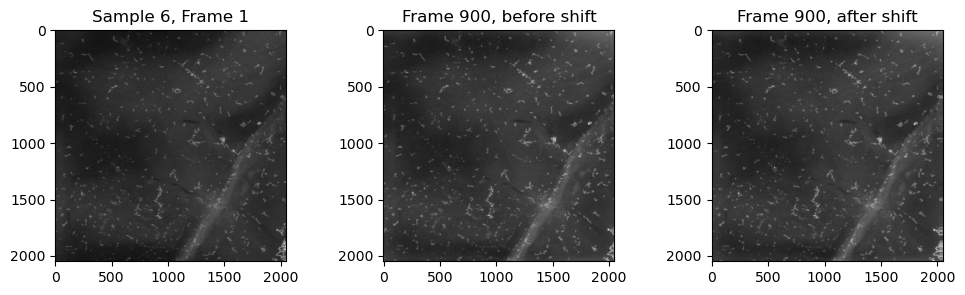

In [3]:
# Display f1, and f900, before and after the shift

fig2, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(12, 3))
ax0.imshow(IR.base_image_normalized, cmap='gray')
ax0.set_title("Sample 6, Frame 1")

ax1.imshow(IR.target_image_normalized, cmap='gray')
ax1.set_title("Frame 900, before shift")

ax2.imshow(IR.registered_image, cmap='gray')
ax2.set_title("Frame 900, after shift")

In [4]:
# non-rigid registration
IR.register_images(method='nonrigid')

print('Registered image infor:', len(IR.registered_image.shape), IR.registered_image.dtype, 
      np.min(IR.registered_image), np.max(IR.registered_image))

Registered image infor: 2 float64 0.03220381334138249 0.9157161777980771


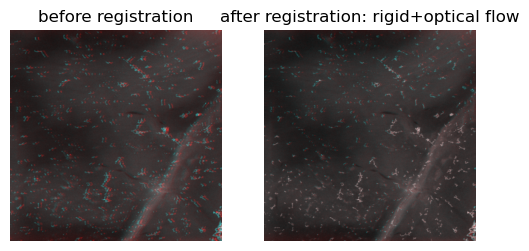

In [5]:
IR.create_visualization();

fig4, (ax0, ax1) = plt.subplots(1, 2, figsize=(6, 4))

ax0.imshow(IR.rgb_before)
ax0.set_title("before registration")
ax0.set_axis_off()

ax1.imshow(IR.rgb_after)
ax1.set_title("after registration: rigid+optical flow")
ax1.set_axis_off()

fig.tight_layout()

In [6]:
# test of quiver plot function
QV=IR.generate_quiver_plot_data(nvec=20, threshold=6);
QV.get('x').shape

(21, 21)

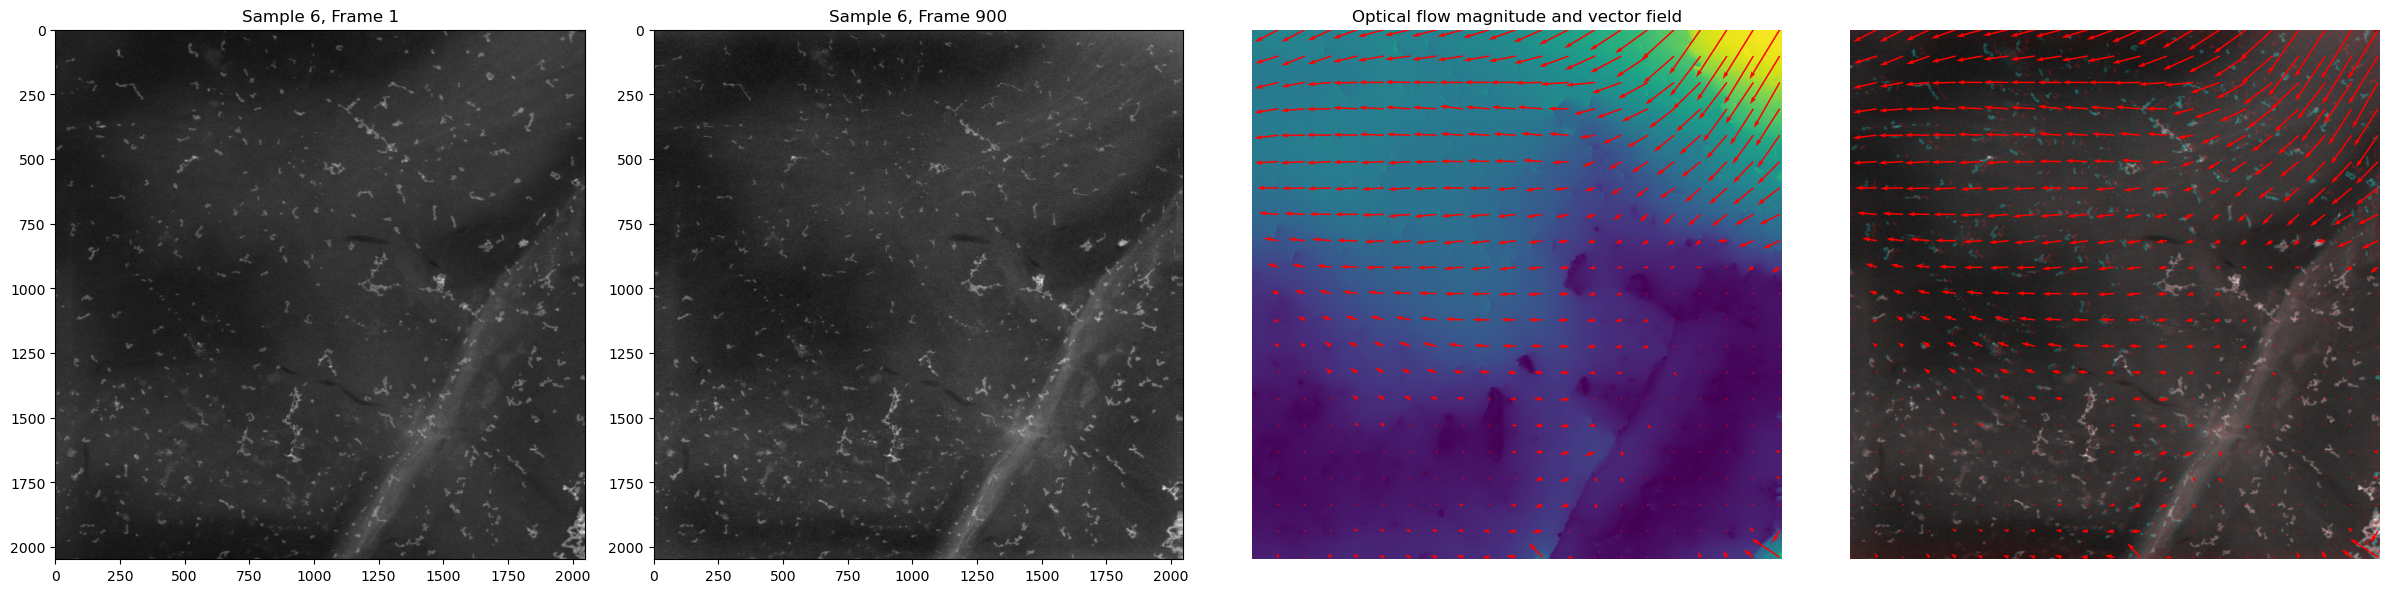

In [8]:
# Display

fig, ax = plt.subplots(1, 4, figsize=(24, 6))

ax[0].imshow(IR.base_image_normalized, cmap='gray')
ax[0].set_title("Sample 6, Frame 1")

ax[1].imshow(IR.registered_image, cmap='gray')
ax[1].set_title("Sample 6, Frame 900")

ax[2].imshow(IR.flow_magnitude)
ax[2].quiver(QV.get('x'), QV.get('y'), QV.get('u'), QV.get('v'), color='r', units='dots', angles='xy', scale_units='xy', lw=3)
ax[2].set_title("Optical flow magnitude and vector field")
ax[2].set_axis_off()

ax[3].imshow(IR.rgb_after, cmap='gray')
ax[3].quiver(QV.get('x'), QV.get('y'), QV.get('u'), QV.get('v'), color='r', units='dots', angles='xy', scale_units='xy', lw=3)
ax[3].set_axis_off()

fig.tight_layout()

plt.show()

Text(0, 0.5, 'Frequency')

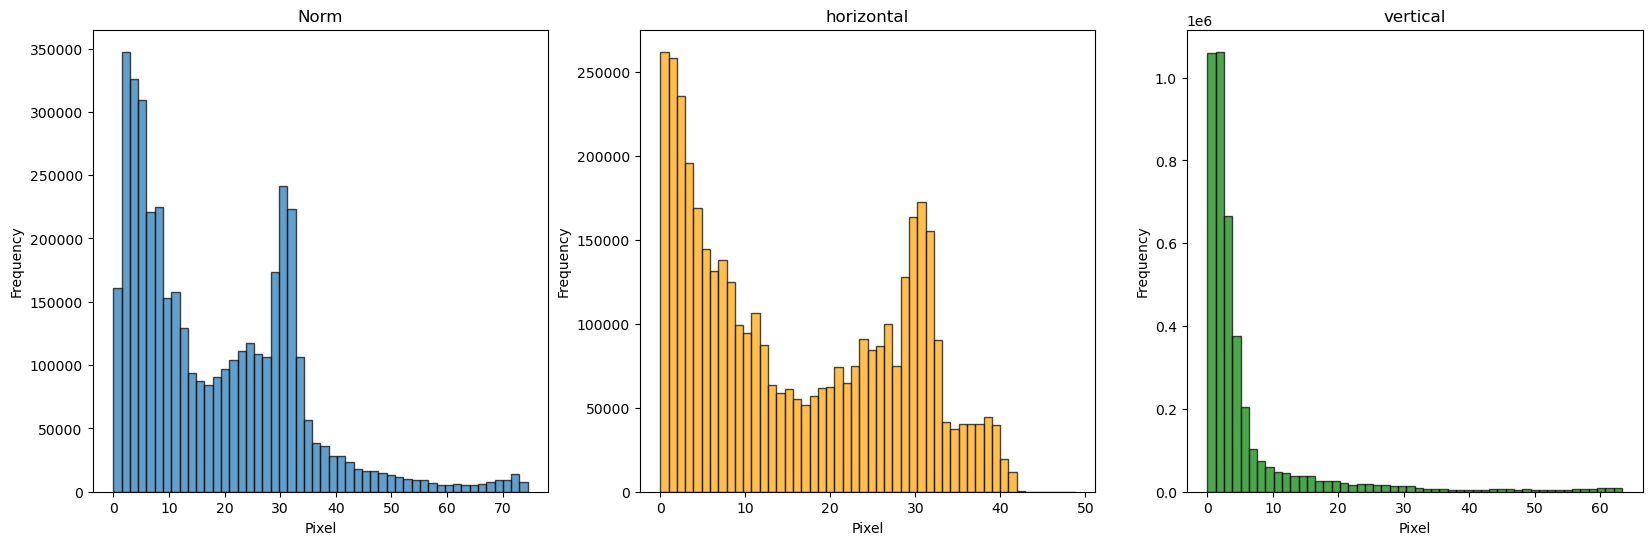

In [15]:
# test of histogram function
HistData=IR.calculate_histogram_data();

norm_flat=HistData.get('norm')
u_flat=HistData.get('u')
v_flat=HistData.get('v')

# histograph of norm, u1, v1
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

axs[0].hist(norm_flat, bins=50, edgecolor='black', alpha=0.7)
axs[0].set_title('Norm')
axs[0].set_xlabel('Pixel')
axs[0].set_ylabel('Frequency')

axs[1].hist(abs(u_flat), bins=50, edgecolor='black', alpha=0.7, color='orange')
axs[1].set_title('horizontal')
axs[1].set_xlabel('Pixel')
axs[1].set_ylabel('Frequency')

axs[2].hist(abs(v_flat), bins=50, edgecolor='black', alpha=0.7, color='green')
axs[2].set_title('vertical')
axs[2].set_xlabel('Pixel')
axs[2].set_ylabel('Frequency')